In [1]:
import numpy as np
from pathfinding import a_star
import pickle
from utils.magic import ordinator

In [2]:
maze=np.loadtxt("mask.txt")

In [3]:
import matplotlib.pyplot as plt

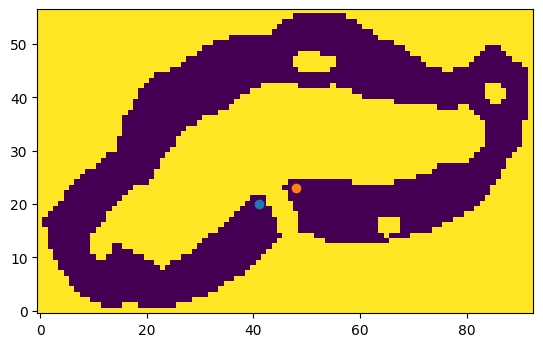

In [4]:
plt.imshow(maze, origin='lower')
plt.scatter(41,20)
plt.scatter(48,23)

In [5]:
with open("pathfinding/SLAM20240204_162557.pickle",'rb') as f:
    file=pickle.load(f)

In [6]:
file['ids'];

def find_extremes(ids, positions):
    mask_start_line = (ids < 100) & (ids > 0)
    positions_start_line = positions[mask_start_line]
    pos_start_line_ordered = np.array(
        ordinator(positions_start_line, max_distance=0.2))
    first = pos_start_line_ordered[0]
    last = pos_start_line_ordered[-1]

    radius = np.sqrt((first[0]-last[0])**2+(last[1]-first[1])**2)
    
    return (first, last, radius, positions_start_line, pos_start_line_ordered, )

aa=find_extremes(np.array(file["ids"]), np.array(file["positions"]))

Missing 2 nodes to close the polygon; min_dist = 0.33843503498998734


In [7]:
external_ordered=np.array(file["positions"])    
min_x = np.min(external_ordered[:, 0])
min_y = np.min(external_ordered[:, 1])

In [8]:
aa

(array([ 0.08762329, -0.06233885]),
 array([-0.01816429,  0.16464154]),
 0.250421863970741,
 array([[ 0.08762329, -0.06233885],
        [ 0.16064477, -0.24107566],
        [ 0.05422091,  0.01242301],
        [ 0.0181294 ,  0.09668964],
        [ 0.13484688, -0.13722905],
        [-0.01816429,  0.16464154]]),
 array([[ 0.08762329, -0.06233885],
        [ 0.05422091,  0.01242301],
        [ 0.0181294 ,  0.09668964],
        [-0.01816429,  0.16464154]]))

In [9]:
spatial_step=0.05
x,y=aa[0]
xx,yy=aa[1]
index_x = int(abs(min_x-x)/spatial_step)
index_y = int(abs(min_y-y)/spatial_step)

index_xx = int(abs(min_x-xx)/spatial_step)
index_yy= int(abs(min_y-yy)/spatial_step)

In [10]:
def matrix(xy):
    x,y=xy
    index_x = int(abs(min_x-x)/spatial_step)
    index_y = int(abs(min_y-y)/spatial_step)
    return index_x, index_y

In [11]:
matrix(aa[0])

(46, 19)

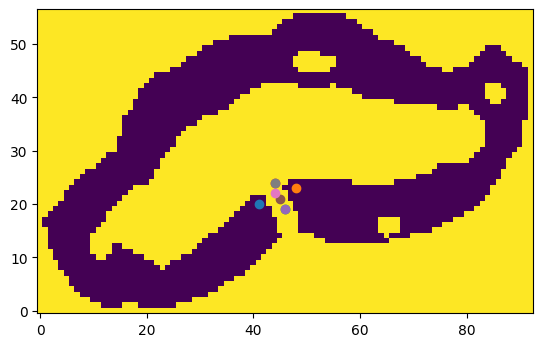

In [12]:
plt.imshow(maze, origin='lower')
plt.scatter(41,20)
plt.scatter(48,23)
plt.scatter(index_x, index_y)
plt.scatter(index_xx, index_yy)
for i in aa[-1]:
    plt.scatter(*matrix(i))

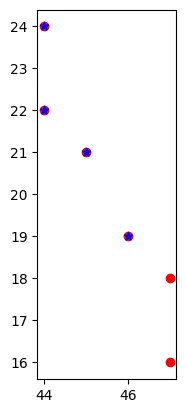

In [14]:
for i in aa[-2]:
    plt.scatter(*matrix(i), c='r')

for i in aa[-1]:
    plt.scatter(*matrix(i), c='b', marker='*')

plt.gca().set_aspect('equal')